Branden Frieden
u1038942
5/18/2023
CS6017
HW# 2

# Part 1 - Data Aquisition

In [195]:
from bs4 import BeautifulSoup
import urllib.request
import time
url = "https://news.ycombinator.com/?p="
for i in range(1, 6):
    # here we actually access the website
    newUrl = url+str(i)
    print(newUrl)
    with urllib.request.urlopen( newUrl ) as response:
        html = response.read()
        html = html.decode( 'utf-8' )

    # save the file
    with open( 'Hacker NewsP' + str(i) + '.html', 'w' ) as new_file:
        new_file.write(html)
    if i != 5:
        time.sleep(31)

https://news.ycombinator.com/?p=1
https://news.ycombinator.com/?p=2
https://news.ycombinator.com/?p=3
https://news.ycombinator.com/?p=4
https://news.ycombinator.com/?p=5


In [219]:
from bs4 import BeautifulSoup
HN = [BeautifulSoup( open("Hacker NewsP1.html"), "html.parser" ), BeautifulSoup( open("Hacker NewsP2.html"), "html.parser" ), BeautifulSoup( open("Hacker NewsP3.html"), "html.parser" ), BeautifulSoup( open("Hacker NewsP4.html"), "html.parser" ), BeautifulSoup( open("Hacker NewsP5.html"), "html.parser" )]

In [220]:
print(HN[1].prettify())


<html lang="en" op="news">
 <head>
  <meta content="origin" name="referrer"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="news.css?ZhGnJauZNGGl34VXWGx1" rel="stylesheet" type="text/css"/>
  <link href="favicon.ico" rel="shortcut icon"/>
  <link href="rss" rel="alternate" title="RSS" type="application/rss+xml"/>
  <title>
   Hacker News
  </title>
 </head>
 <body>
  <center>
   <table bgcolor="#f6f6ef" border="0" cellpadding="0" cellspacing="0" id="hnmain" width="85%">
    <tr>
     <td bgcolor="#ff6600">
      <table border="0" cellpadding="0" cellspacing="0" style="padding:2px" width="100%">
       <tr>
        <td style="width:18px;padding-right:4px">
         <a href="https://news.ycombinator.com">
          <img height="18" src="y18.svg" style="border:1px white solid; display:block" width="18"/>
         </a>
        </td>
        <td style="line-height:12pt; height:10px;">
         <span class="pagetop">
          <b class="hnname">
    

In [221]:
allRanks = [x for x in range(1, 151)]

In [222]:
allTitles = []
for i in range(len(HN)):
    titles = HN[i].find_all( "span", {"class": "titleline"} )
    stringTitles = [ tag.get_text() for tag in titles ]
    for j in range(len(stringTitles)):
        allTitles.append(stringTitles[j])
display(allTitles)

['AWS us-east-1 down',
 'Andromeda Cluster: 10 Exaflops* for Startups from Nat Friedman and Daniel Gross (andromedacluster.com)',
 'Modern language models refute Chomsky’s approach to language (scholar.google.com)',
 'Rewriting the Ruby parser (railsatscale.com)',
 'NuShell: A New Type of Shell (github.com/nushell)',
 'Launch HN: Resend (YC W23) – Email API for developers using React (resend.com)',
 'Text Editor Data Structures (cdacamar.github.io)',
 'Teach yourself Computer Science functionally (functionalcs.github.io)',
 'The Icelandic Art of Swim Lessons (fatherly.com)',
 'Track HN: Survival Rate of 120,396 Show HN Stories (June 2023) (nami.land)',
 'BuildZoom (better way to build custom homes) Is hiring a Growth Associate (lever.co)',
 'Comic Mono (dtinth.github.io)',
 'If you want people to show up, data shows these are the best meeting times (boomerangapp.com)',
 'Private equity bought out your doctor and bankrupted Toys“R”Us (theverge.com)',
 'Working quickly is more important 

In [223]:
titleLengths = []
for title in allTitles:
    titleLengths.append(len(title))

In [224]:
from datetime import datetime, timezone
allTimes = []
for i in range(len(HN)):
    times = HN[i].find_all( "span", {"class": "age"} )
    stringTimes = []
    for tag in times:
        posted = datetime.strptime(tag['title'], '%Y-%m-%dT%H:%M:%S')
        now = datetime.now(timezone.utc)
        stringTimes.append(int(((now.day - posted.day) * 24 + (now.hour - posted.hour) + ((now.minute - posted.minute) / 60))))
    for j in range(len(stringTimes)):
        allTimes.append(stringTimes[j])
display(allTimes)


[0,
 3,
 2,
 6,
 2,
 7,
 3,
 3,
 1,
 2,
 2,
 3,
 0,
 1,
 3,
 2,
 8,
 6,
 5,
 2,
 12,
 12,
 19,
 1,
 7,
 21,
 5,
 22,
 20,
 6,
 11,
 25,
 21,
 3,
 22,
 17,
 0,
 0,
 3,
 3,
 19,
 0,
 5,
 15,
 21,
 16,
 0,
 7,
 24,
 0,
 4,
 0,
 3,
 21,
 16,
 6,
 26,
 16,
 6,
 20,
 24,
 1,
 5,
 26,
 26,
 23,
 21,
 21,
 21,
 68,
 0,
 23,
 22,
 2,
 24,
 21,
 31,
 8,
 10,
 27,
 18,
 2,
 28,
 8,
 20,
 16,
 36,
 18,
 22,
 13,
 28,
 15,
 7,
 1,
 18,
 3,
 22,
 29,
 17,
 33,
 25,
 25,
 34,
 29,
 36,
 30,
 10,
 21,
 29,
 12,
 26,
 26,
 39,
 38,
 23,
 41,
 10,
 19,
 4,
 36,
 17,
 46,
 24,
 23,
 31,
 28,
 54,
 6,
 45,
 2,
 28,
 23,
 5,
 7,
 27,
 34,
 12,
 39,
 11,
 12,
 51,
 35,
 34,
 57,
 20,
 39,
 33,
 53,
 36,
 16]

In [225]:
allScores = []
for i in range(len(HN)):
    subtexts = HN[i].find_all( "td", {"class": "subtext"} )
    subtextHTML = [ tag for tag in subtexts ]
    stringScores = []

    # finds all the subtext blocks (every entry has this)
    for st in subtextHTML:
        # finds score in the subtext if it exists (None if it doesn't)
        score = st.find( "span", {"class": "score"} )

        # use score if it exists, else enter 0 points
        if score is not None:
            stringScores.append(  int(''.join(filter(str.isdigit, score.get_text()))) )
        else:
            stringScores.append( 0 )

    for j in range(len(stringScores)):
        allScores.append(stringScores[j])
display(allScores)

[209,
 139,
 125,
 347,
 58,
 321,
 120,
 84,
 37,
 52,
 0,
 441,
 20,
 133,
 148,
 204,
 287,
 114,
 117,
 14,
 31,
 6,
 18,
 33,
 108,
 55,
 158,
 144,
 22,
 282,
 176,
 129,
 77,
 441,
 99,
 652,
 10,
 4,
 22,
 5,
 601,
 36,
 79,
 150,
 40,
 16,
 4,
 113,
 62,
 4,
 52,
 43,
 14,
 366,
 205,
 118,
 521,
 128,
 49,
 363,
 126,
 6,
 41,
 1894,
 343,
 49,
 248,
 281,
 184,
 696,
 13,
 124,
 162,
 5,
 106,
 179,
 320,
 47,
 36,
 225,
 32,
 174,
 368,
 81,
 90,
 181,
 127,
 97,
 518,
 105,
 1039,
 74,
 34,
 9,
 29,
 5,
 198,
 59,
 10,
 273,
 70,
 109,
 191,
 805,
 42,
 148,
 24,
 53,
 169,
 11,
 224,
 244,
 424,
 52,
 437,
 334,
 19,
 166,
 9,
 65,
 11,
 388,
 382,
 60,
 189,
 56,
 55,
 12,
 341,
 92,
 360,
 47,
 7,
 13,
 189,
 159,
 5,
 21,
 27,
 22,
 139,
 37,
 164,
 52,
 77,
 228,
 145,
 274,
 72,
 31]

In [226]:
allComments = []
for i in range(len(HN)):
    subtexts = HN[i].find_all( "td", {"class": "subtext"} )
    subtextHTML = [ tag for tag in subtexts ]
    comments = []

    # finds all the subtext blocks (every entry has this)
    for st in subtextHTML:
        stString = st.text
        if stString.find('comment')!= -1:
            start = stString.index('comment')
            val = 0
            place = 1
            start -= 2
            while(stString[start].isdigit()):
                val += int(stString[start]) * place
                place *= 10
                start -= 1
            comments.append(val)
        else:
            comments.append(0)

    for j in range(len(comments)):
        allComments.append(comments[j])
display(allComments)

[61,
 33,
 125,
 102,
 10,
 209,
 24,
 25,
 34,
 18,
 0,
 97,
 5,
 64,
 75,
 85,
 149,
 50,
 37,
 3,
 5,
 0,
 1,
 13,
 47,
 24,
 170,
 75,
 17,
 164,
 67,
 80,
 14,
 453,
 50,
 269,
 1,
 0,
 2,
 7,
 156,
 10,
 21,
 22,
 14,
 5,
 0,
 40,
 9,
 0,
 8,
 12,
 1,
 235,
 52,
 139,
 405,
 70,
 34,
 134,
 7,
 4,
 1,
 574,
 49,
 16,
 307,
 496,
 107,
 894,
 2,
 127,
 151,
 0,
 25,
 292,
 147,
 7,
 9,
 118,
 10,
 207,
 86,
 70,
 145,
 58,
 48,
 16,
 83,
 46,
 462,
 25,
 15,
 1,
 0,
 0,
 116,
 48,
 1,
 165,
 26,
 132,
 121,
 648,
 21,
 77,
 13,
 54,
 65,
 0,
 336,
 218,
 95,
 5,
 206,
 142,
 0,
 506,
 1,
 8,
 0,
 68,
 50,
 22,
 102,
 34,
 11,
 1,
 154,
 127,
 180,
 0,
 1,
 17,
 53,
 263,
 0,
 4,
 8,
 16,
 24,
 1,
 197,
 68,
 62,
 20,
 69,
 85,
 30,
 5]

# Part 2 - Regression

In [227]:
import pandas as pd
import statsmodels.formula.api as sm



In [228]:
df = pd.DataFrame([allRanks, titleLengths, allTimes, allScores, allComments]).transpose()
df.columns = ['Ranks', 'titleLengths', 'ages', 'scores', 'comments']
print(df)

     Ranks  titleLengths  ages  scores  comments
0        1            18     0     209        61
1        2           102     3     139        33
2        3            81     2     125       125
3        4            44     6     347       102
4        5            49     2      58        10
..     ...           ...   ...     ...       ...
145    146            98    39     228        20
146    147            67    33     145        69
147    148            89    53     274        85
148    149            75    36      72        30
149    150            33    16      31         5

[150 rows x 5 columns]


In [229]:
rank1_ols = sm.ols(formula="Ranks ~ ages + scores + comments", data=df ).fit()
display(rank1_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ranks   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     30.68
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           1.93e-15
Time:                        13:51:51   Log-Likelihood:                -741.40
No. Observations:                 150   AIC:                             1491.
Df Residuals:                     146   BIC:                             1503.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.6671      4.641     10.055      0.000      37.495      55.839
ages           2.0478      0.214      9.551      0.000       1.624       2.472
scores        -0.0349      0.019     -1.864      0.064      -0.072       0.002
comments      -0.0169      0.030     -0.556      0.579      -0.077       0.043
==============================================================================
Omnibus:                        3.633   Durbin-Watson:                   0.854
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.288
Skew:                           0.284   Prob(JB):                        0.193
Kurtosis:                       2.549   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
rank2_ols = sm.ols(formula="Ranks ~ scores + comments", data=df ).fit()
display(rank2_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ranks   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2546
Date:                Tue, 13 Jun 2023   Prob (F-statistic):              0.776
Time:                        13:51:51   Log-Likelihood:                -777.81
No. Observations:                 150   AIC:                             1562.
Df Residuals:                     147   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.5942      4.467     16.922      0.000      66.766      84.423
scores        -0.0150      0.024     -0.634      0.527      -0.062       0.032
comments       0.0262      0.038      0.686      0.494      -0.049       0.102
==============================================================================
Omnibus:                       61.078   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.004
Skew:                           0.014   Prob(JB):                       0.0111
Kurtosis:                       1.800   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
rank3_ols = sm.ols(formula="Ranks ~ ages ", data=df ).fit()
display(rank3_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ranks   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     77.54
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           3.19e-15
Time:                        13:51:51   Log-Likelihood:                -746.47
No. Observations:                 150   AIC:                             1497.
Df Residuals:                     148   BIC:                             1503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.3970      4.648      9.337      0.000      34.212      52.582
ages           1.8275      0.208      8.806      0.000       1.417       2.238
==============================================================================
Omnibus:                        2.909   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                2.942
Skew:                           0.310   Prob(JB):                        0.230
Kurtosis:                       2.704   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
rank4_ols = sm.ols(formula="Ranks ~ titleLengths + ages + scores + comments", data=df ).fit()
display(rank4_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ranks   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     23.04
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           9.42e-15
Time:                        13:51:51   Log-Likelihood:                -741.17
No. Observations:                 150   AIC:                             1492.
Df Residuals:                     145   BIC:                             1507.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       40.6188     10.135      4.008      0.000      20.587      60.651
titleLengths     0.0917      0.137      0.672      0.503      -0.178       0.362
ages             2.0595      0.216      9.557      0.000       1.634       2.485
scores          -0.0360      0.019     -1.912      0.058      -0.073       0.001
comments        -0.0158      0.031     -0.518      0.606      -0.076       0.045
==============================================================================
Omnibus:                        3.253   Durbin-Watson:                   0.854
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.083
Skew:                           0.286   Prob(JB):                        0.214
Kurtosis:                       2.594   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The most valuable model above is the Ranks ~ titleLengths + ages + scores + comments,
* it gives us a R^2 value of .343
* Intercept is 26.5
* titleLengths p = .208, with coef = .2039
* ages p = .000, with coef = 1.3611
* scores p = .02, with coef = -.0381
* comments p = .031, with coef = .0568

these tell us that title lenghths are the least likely to matter, while ages matter the most.

Text(0.5, 0, 'Age (hours)')

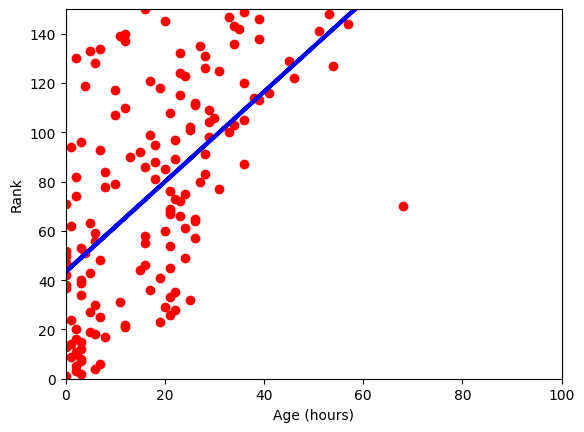

In [233]:
import matplotlib.pyplot as plt
import numpy as np
from   sklearn import linear_model

plt.scatter(x = df['ages'], y = df['Ranks'], color='red')
xs = np.linspace(0, 2000, 2)

plt.plot( df['ages'], rank3_ols.predict(), color='blue', linewidth=3 )
plt.xlim(0, 100)
plt.ylim(0, 150)
plt.ylabel('Rank')
plt.xlabel('Age (hours)')

In [234]:
import plotly.express as px
scatterData = df.loc[:,['Ranks', 'titleLengths', 'ages', 'scores', 'comments']]
fig = px.scatter_matrix(scatterData, dimensions=['Ranks', 'titleLengths', 'ages', 'scores', 'comments'])
fig.update_layout(height=800, width=1200)
fig.show()

not really any linear relationships between any of the variables except a slight one between scores(points) and comments.

# Part 3 - Classification

In [235]:
def front_to_numeric(x):
    if x<=30:
        return 1
    else: 
        return 0
    
dfMod = df.copy()

dfMod["Ranks"] = df["Ranks"].apply(front_to_numeric)
dfMod.head(10)

,Ranks,titleLengths,ages,scores,comments
0,1,18,0,209,61
1,1,102,3,139,33
2,1,81,2,125,125
3,1,44,6,347,102
4,1,49,2,58,10
5,1,78,7,321,209
6,1,48,3,120,24
7,1,69,3,84,25
8,1,48,1,37,34
9,1,74,2,52,18


In [236]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

r_all  = smf.logit( "Ranks ~ titleLengths + ages + scores + comments", data=dfMod ).fit( disp=0 )
print( "Front vs All:  %.2f%%" % ( r_all.prsquared * 100 ) )

Front vs All:  24.50%


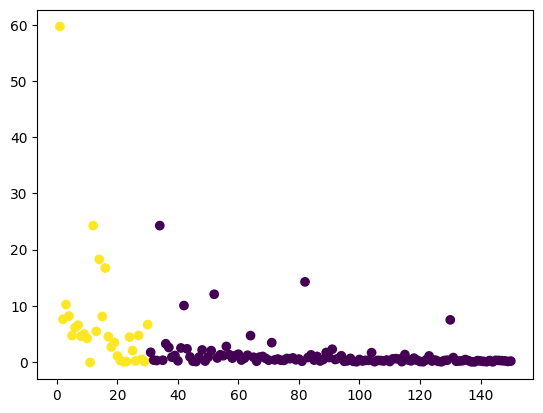

In [237]:
#Score = (P-1) / (T+2)^G
from   matplotlib.pyplot import plot
from   matplotlib import pyplot as plt

guesScores = (dfMod['scores'] - 1) / ((dfMod['ages'] + 2) ** 1.8)
plt.scatter(df['Ranks'], guesScores, c=dfMod.Ranks, cmap="viridis")
dfMod['guessScores'] = guesScores

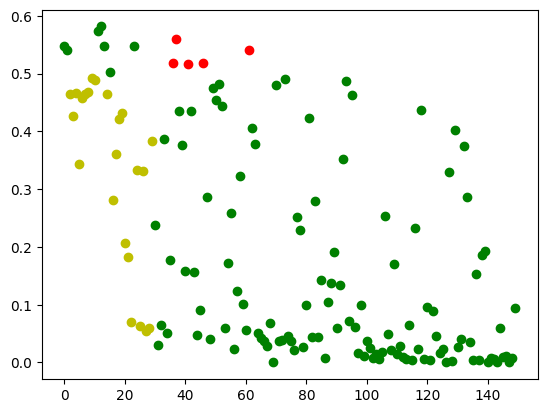

In [238]:
from   matplotlib.pyplot import plot
from   matplotlib import pyplot as plt

x_train = dfMod[ [ "titleLengths", "ages", "scores", "comments" ] ]
dfMod[ "train_predictions" ] = r_all.predict( x_train )


# Plot predicted admit that were admitted
df_correct = dfMod[ (dfMod.train_predictions >= 0.5) & (dfMod.Ranks == 1.0) ]
plot( df_correct.train_predictions, 'go' )

# Plot predicted non-admit that were not admitted
df_correct = dfMod[ (dfMod.train_predictions < 0.5) & (dfMod.Ranks == 0.0) ]
plot( df_correct.train_predictions, 'go' )

# Plot predicted admit that were NOT admitted
df_false_pos = dfMod[ (dfMod.train_predictions >= 0.5) & (dfMod.Ranks == 0.0) ]
plot( df_false_pos.train_predictions, 'ro' )

# Plot predicted NOT-admit that were admitted
df_false_neg = dfMod[ (dfMod.train_predictions < 0.5) & (dfMod.Ranks == 1.0) ]
plot( df_false_neg.train_predictions, 'yo' )

Optimization terminated successfully.
         Current function value: 0.416135
         Iterations 7


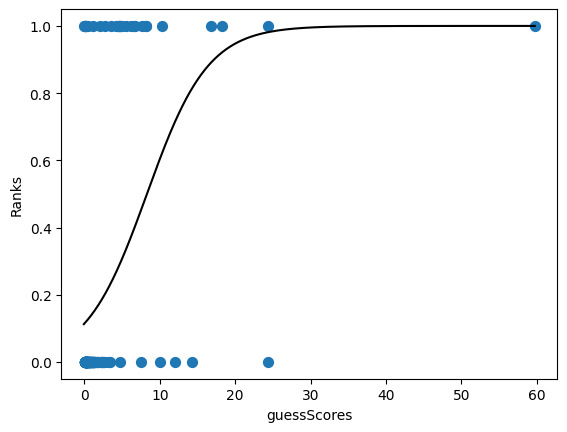

In [239]:
exam_model = smf.logit(formula="Ranks ~ guessScores", data=dfMod).fit()
exam_model.summary()

dfMod.plot.scatter( x='guessScores', y='Ranks', s=50 )

logistic = lambda x: 1 / ( 1 + np.exp(-x) )

par = dict( exam_model.params )

xs = np.linspace( dfMod['guessScores'].min(), dfMod['guessScores'].max(), 1000 )
ys = logistic( par['Intercept'] + par['guessScores']*xs )
plt.plot( xs, ys, color='Black' )

Optimization terminated successfully.
         Current function value: 0.385338
         Iterations 7


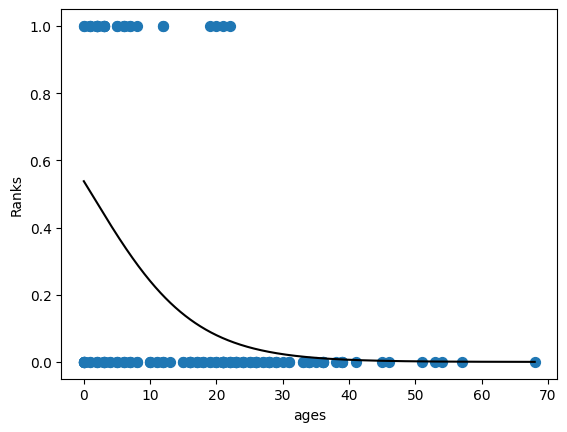

In [240]:
exam_model = smf.logit(formula="Ranks ~ ages", data=dfMod).fit()
exam_model.summary()

dfMod.plot.scatter( x='ages', y='Ranks', s=50 )

logistic = lambda x: 1 / ( 1 + np.exp(-x) )

par = dict( exam_model.params )

xs = np.linspace( dfMod['ages'].min(), dfMod['ages'].max(), 1000 )
ys = logistic( par['Intercept'] + par['ages']*xs )
plt.plot( xs, ys, color='Black' )

Optimization terminated successfully.
         Current function value: 0.496706
         Iterations 6


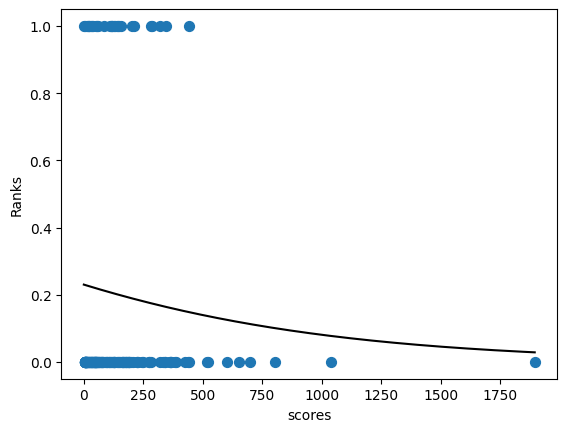

In [241]:
exam_model = smf.logit(formula="Ranks ~ scores", data=dfMod).fit()
exam_model.summary()

dfMod.plot.scatter( x='scores', y='Ranks', s=50 )

logistic = lambda x: 1 / ( 1 + np.exp(-x) )

par = dict( exam_model.params )

xs = np.linspace( dfMod['scores'].min(), dfMod['scores'].max(), 1000 )
ys = logistic( par['Intercept'] + par['scores']*xs )
plt.plot( xs, ys, color='Black' )